In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

## Dataset Iris

In [2]:
iris = pd.read_csv('iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
x = iris.drop('species', axis=1).values
y = iris['species'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [4]:
kf = KFold(n_splits=5)

In [5]:
gnb = GaussianNB()
mnb = MultinomialNB()

accuracies_gnb = []
accuracies_mnb = []

Accuracy of GaussianNB: 0.8571428571428571
Accuracy of MultinomialNB: 0.5714285714285714
Accuracy of GaussianNB: 0.9523809523809523
Accuracy of MultinomialNB: 0.7142857142857143
Accuracy of GaussianNB: 1.0
Accuracy of MultinomialNB: 0.9523809523809523
Accuracy of GaussianNB: 1.0
Accuracy of MultinomialNB: 0.6666666666666666
Accuracy of GaussianNB: 0.9047619047619048
Accuracy of MultinomialNB: 0.5714285714285714
Average accuracy of GaussianNB: 0.9428571428571428
Average accuracy of MultinomialNB: 0.6952380952380952
Best classifier: GaussianNB
Accuracy: 1.0
Reporte de clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



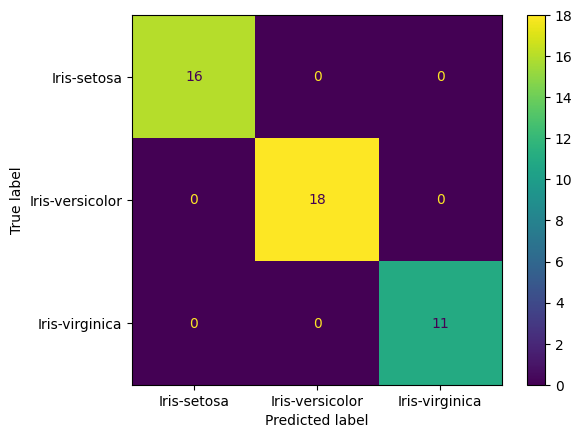

In [6]:
for train_index, val_index in kf.split(x_train):
    x_train_kf, x_val = x_train[train_index], x_train[val_index]
    y_train_kf, y_val = y_train[train_index], y_train[val_index]

    gnb.fit(x_train_kf, y_train_kf)
    mnb.fit(x_train_kf, y_train_kf)

    y_pred_gnb = gnb.predict(x_val)
    y_pred_mnb = mnb.predict(x_val)

    accuracy_gnb = accuracy_score(y_val, y_pred_gnb)
    accuracy_mnb = accuracy_score(y_val, y_pred_mnb)

    print('Accuracy of GaussianNB:', accuracy_gnb)
    print('Accuracy of MultinomialNB:', accuracy_mnb)

    accuracies_gnb.append(accuracy_gnb)
    accuracies_mnb.append(accuracy_mnb)

average_accuracy_gnb = np.mean(accuracies_gnb)
average_accuracy_mnb = np.mean(accuracies_mnb)

print('Average accuracy of GaussianNB:', average_accuracy_gnb)
print('Average accuracy of MultinomialNB:', average_accuracy_mnb)

accuracies_gnb.append(average_accuracy_gnb)
accuracies_mnb.append(average_accuracy_mnb)

if average_accuracy_gnb > average_accuracy_mnb:
    best_clf = gnb
    print('Best classifier: GaussianNB')
else:
    best_clf = mnb
    print('Best classifier: MultinomialNB')

best_clf.fit(x_train, y_train)
y_pred = best_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(report)

cm = confusion_matrix(y_test, y_pred)

cmd = ConfusionMatrixDisplay(cm, display_labels=best_clf.classes_)
cmd.plot()
plt.show()

## Dataset Emails

In [7]:
emails = pd.read_csv('emails.csv')
emails

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [8]:
emails = emails.drop(emails.columns[0], axis=1)

x2 = emails.drop('Prediction', axis=1).values
y2 = emails['Prediction'].values

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=0)

In [9]:
kf2 = KFold(n_splits=5)

In [10]:
gnb2 = GaussianNB()
mnb2 = MultinomialNB()

accuracies_gnb2 = []
accuracies_mnb2 = []

Accuracy of GaussianNB: 0.9475138121546961
Accuracy of MultinomialNB: 0.9516574585635359
Accuracy of GaussianNB: 0.9571823204419889
Accuracy of MultinomialNB: 0.9447513812154696
Accuracy of GaussianNB: 0.9502762430939227
Accuracy of MultinomialNB: 0.9433701657458563
Accuracy of GaussianNB: 0.9516574585635359
Accuracy of MultinomialNB: 0.9461325966850829
Accuracy of GaussianNB: 0.9447513812154696
Accuracy of MultinomialNB: 0.9433701657458563
Average accuracy of GaussianNB: 0.9502762430939227
Average accuracy of MultinomialNB: 0.9458563535911602
Best classifier: GaussianNB
Accuracy: 0.9484536082474226
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1111
           1       0.88      0.95      0.91       441

    accuracy                           0.95      1552
   macro avg       0.93      0.95      0.94      1552
weighted avg       0.95      0.95      0.95      1552



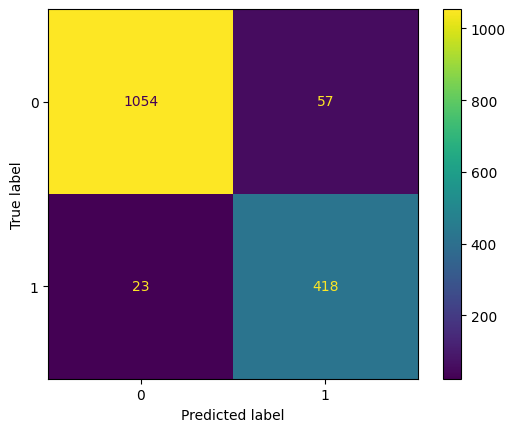

In [11]:
for train_index, val_index in kf2.split(x_train2):
    x_train_kf2, x_val2 = x_train2[train_index], x_train2[val_index]
    y_train_kf2, y_val2 = y_train2[train_index], y_train2[val_index]

    gnb2.fit(x_train_kf2, y_train_kf2)
    mnb2.fit(x_train_kf2, y_train_kf2)

    y_pred_gnb2 = gnb2.predict(x_val2)
    y_pred_mnb2 = mnb2.predict(x_val2)

    accuracy_gnb2 = accuracy_score(y_val2, y_pred_gnb2)
    accuracy_mnb2 = accuracy_score(y_val2, y_pred_mnb2)

    print('Accuracy of GaussianNB:', accuracy_gnb2)
    print('Accuracy of MultinomialNB:', accuracy_mnb2)

    accuracies_gnb2.append(accuracy_gnb2)
    accuracies_mnb2.append(accuracy_mnb2)

average_accuracy_gnb2 = np.mean(accuracies_gnb2)
average_accuracy_mnb2 = np.mean(accuracies_mnb2)

print('Average accuracy of GaussianNB:', average_accuracy_gnb2)
print('Average accuracy of MultinomialNB:', average_accuracy_mnb2)

accuracies_gnb2.append(average_accuracy_gnb2)
accuracies_mnb2.append(average_accuracy_mnb2)

if average_accuracy_gnb2 > average_accuracy_mnb2:
    best_clf2 = gnb2
    print('Best classifier: GaussianNB')
else:
    best_clf2 = mnb2
    print('Best classifier: MultinomialNB')

best_clf2.fit(x_train2, y_train2)
y_pred2 = best_clf2.predict(x_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print('Accuracy:', accuracy2)

report2 = classification_report(y_test2, y_pred2)
print("Reporte de clasificación:")
print(report2)

cm2 = confusion_matrix(y_test2, y_pred2)
cmd2 = ConfusionMatrixDisplay(cm2, display_labels=best_clf2.classes_)
cmd2.plot()

In [12]:
Dataset = ['Iris'] + ['']*11 + ['Emails'] + ['']*11
pliegues = ['5'] + ['']*11 + ['5'] + ['']*11
distribucion = ['Normal'] + ['']*5 + ['Multinomial'] + ['']*5 + ['Normal'] + ['']*5 + ['Multinomial'] + ['']*5
pliegue= ['1', '2', '3', '4', '5', 'Promedio'] * 4
accuracies = [elemento for sublist in [accuracies_gnb, accuracies_mnb, accuracies_gnb2, accuracies_mnb2] for elemento in sublist]

## Tabla 1

In [13]:
info = {'Dataset': Dataset, 'Pliegues': pliegues, 'Distribución': distribucion, 'Pliegue': pliegue, 'Accuracy': accuracies}
T1 = pd.DataFrame(info)
T1

,Dataset,Pliegues,Distribución,Pliegue,Accuracy
0,Iris,5,Normal,1,0.857143
1,,,,2,0.952381
2,,,,3,1.000000
3,,,,4,1.000000
4,,,,5,0.904762
5,,,,Promedio,0.942857
6,,,Multinomial,1,0.571429
7,,,,2,0.714286
8,,,,3,0.952381
9,,,,4,0.666667


## Tabla 2

In [14]:
info2 = {'Dataset': ['Iris', 'Emails'],'Distribucion':[best_clf,best_clf2] ,'Accuracy': [accuracy, accuracy2]}
T2 = pd.DataFrame(info2)
T2

,Dataset,Distribucion,Accuracy
0,Iris,GaussianNB(),1.000000
1,Emails,GaussianNB(),0.948454
